## Verifica Python

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Ho un file di dati 'Nemo_6670.dat'. Leggo le colonne M_ass, b-y e age_parent [Gyr] e grafico M_ass in funzione di b-y (diagramma colore-magnitudine) per le 6670 stelle riportate nel file. Il colore codifica l'età (age_parent) di stelle in un determinato bin di età spiegato nella legenda.

   MsuH    m_ini   logL   logTe  M_ass  b_ass  y_ass     m_app       b-y  \
0  0.28  2.31633  1.696  3.8475  0.450  0.659  0.433  6.377450  0.271987   
1  0.44  2.16245  1.468  3.8049  1.050  1.361  1.032  3.638197  0.339399   
2  0.51  0.96579 -0.332  3.7154  5.773  6.274  5.738  5.667350  0.539040   
3 -0.10  1.01151  0.085  3.7798  4.595  4.951  4.575  5.820310  0.381590   
4 -0.45  0.95608  0.192  3.7971  4.337  4.657  4.319  3.440032  0.340114   

       dist  abs_dist     ID_parent  age_parent  
0  143.4808  143.4808  4.222250e+09    0.742048  
1   32.4452   32.4452  3.150372e+09    1.010928  
2    9.4836    9.4836  4.223612e+09    0.051529  
3   17.4411   17.4411  3.148632e+09    3.687081  
4   -6.5961    6.5961  1.002465e+09    4.605646  


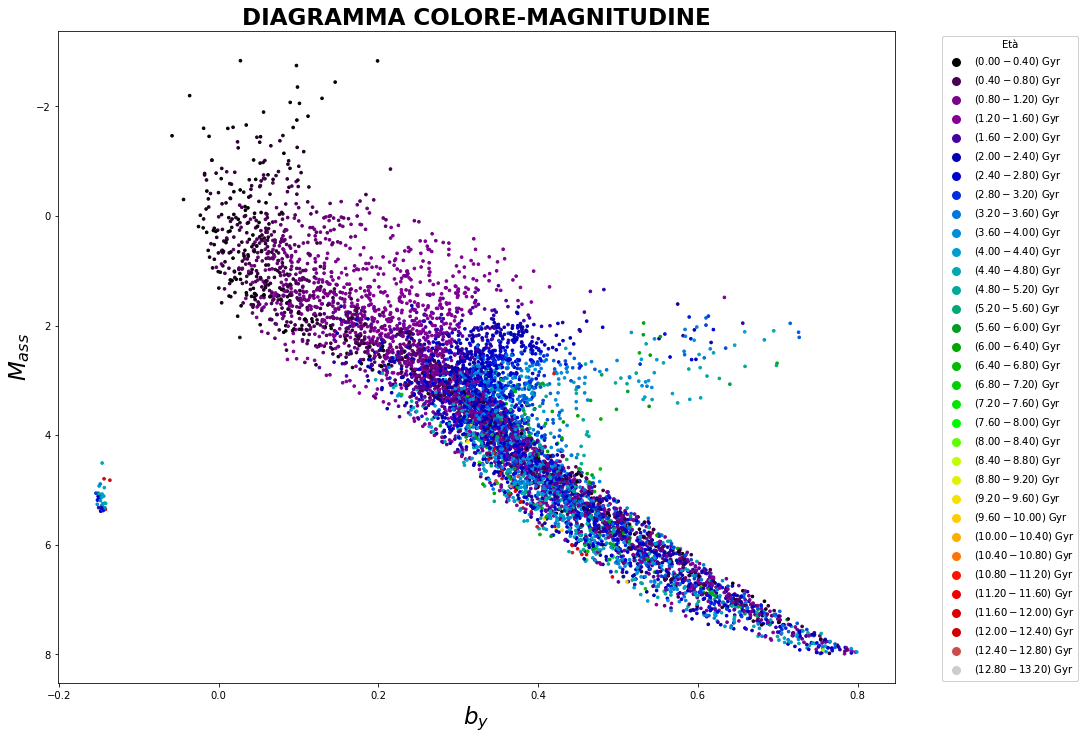

In [2]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
import numpy as np

# Leggo il file di dati 

file = 'Nemo_6670.dat'
data = pd.read_csv(file, delim_whitespace=True)

# Visualizzo le prime righe del file per assicurarmi che i dati siano stati letti correttamente
print(data.head())

# Trovo l'intervallo complessivo delle età
min_age = data['age_parent'].min()
max_age = data['age_parent'].max()

# Calcolo il numero di intervalli di 0.05
num_intervals = int((max_age - min_age) / 0.4) + 1

# Uso una mappa di colori predefinita
cmap = get_cmap('nipy_spectral', num_intervals)
norm = Normalize(vmin=min_age, vmax=max_age)

# Imposto le dimensioni della figura
fig, ax = plt.subplots(figsize=(15, 12))

# Converto le colonne in array NumPy
colonna_b_y = data['b-y'].values
colonna_M_ass = data['M_ass'].values

# Plotto i dati
scatter=plt.scatter(colonna_b_y, colonna_M_ass, s=7, c=data['age_parent'], cmap='nipy_spectral')
plt.title('DIAGRAMMA COLORE-MAGNITUDINE', fontsize=23, fontweight='bold')
plt.xlabel('$b_y$', fontsize=23)
plt.ylabel('$M_{ass}$', fontsize=23)

# Creo una legenda dinamica con colori automatici
legend_labels = [f'$({i * 0.4:.2f}-{(i + 1) * 0.4:.2f})$ Gyr' for i in range(num_intervals)]
legend_colors = [cmap(norm(i * 0.4)) for i in range(num_intervals)]
legend = plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors],
                    labels=legend_labels, title='Età', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().add_artist(legend)

# Inverto l'asse y
plt.gca().invert_yaxis()

plt.show()

Si legge, ora, la metallicità delle stelle e, dividendo il campione di 6670 stelle in 3 sotto-popolazioni in base alla loro età, si studia la distribuzione delle metallicità stellari per le stelle nei tre sotto-campioni.

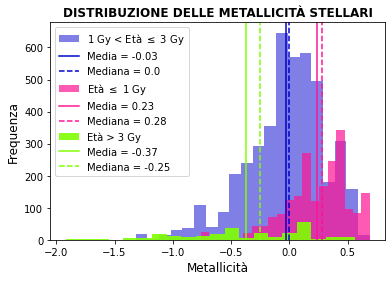

In [3]:
# Divido il campione in tre sotto-campioni 
pop1 = data[data['age_parent'] <= 1]
pop2 = data[(data['age_parent'] > 1) & (data['age_parent'] <= 5)]
pop3 = data[data['age_parent'] > 5]


# Distribuzione, media e mediana del sotto-campione 2
plt.hist(pop2['MsuH'], bins=20, color='mediumblue', alpha=0.5, label='1 Gy < Età $\leq$ 3 Gy')

somma2=0
for i in range(0,len(pop2['MsuH'])-1):
    somma2+=pop2['MsuH'].iloc[i]
media2=somma2/len(pop2['MsuH'])
plt.axvline(x=media2, color='mediumblue', linestyle='solid', label=f'Media = {round(media2,2)}')

mediana2=np.median(pop2['MsuH'])
plt.axvline(x=mediana2, color='mediumblue', linestyle='dashed', label=f'Mediana = {round(mediana2,2)}')

# Distribuzione, media e mediana del sotto-campione 1
plt.hist(pop1['MsuH'], bins=20, color='deeppink', alpha=0.7, label='Età $\leq$ 1 Gy')

somma1=0
for i in range(0,len(pop1['MsuH'])-1):
    somma1+=pop1['MsuH'].iloc[i]
media1=somma1/len(pop1['MsuH'])
plt.axvline(x=media1, color='deeppink', linestyle='solid', label=f'Media = {round(media1,2)}')

mediana1=np.median(pop1['MsuH'])
plt.axvline(x=mediana1, color='deeppink', linestyle='dashed', label=f'Mediana = {round(mediana1,2)}')

# Distribuzione, media e mediana del sotto-campione 3
plt.hist(pop3['MsuH'], bins=20, color='chartreuse', alpha=0.9, label='Età > 3 Gy')

somma3=0
for i in range(0,len(pop3['MsuH'])-1):
    somma3+=pop3['MsuH'].iloc[i]
media3=somma3/len(pop3['MsuH'])
plt.axvline(x=media3, color='chartreuse', linestyle='solid', label=f'Media = {round(media3,2)}')

mediana3=np.median(pop3['MsuH'])
plt.axvline(x=mediana3, color='chartreuse', linestyle='dashed', label=f'Mediana = {round(mediana3,2)}')

# Imposto il grafico
plt.title('DISTRIBUZIONE DELLE METALLICITÀ STELLARI', fontsize=12, fontweight='bold')
plt.xlabel('Metallicità', fontsize=12)
plt.ylabel('Frequenza', fontsize=12)
plt.legend()
plt.show()

Per le tre popolazioni individuate si grafica la metallicità in funzione della massa iniziale.

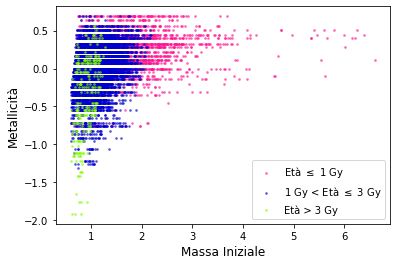

In [4]:
plt.scatter(pop1['m_ini'], pop1['MsuH'], s=3, color='deeppink', label='Età $\leq$ 1 Gy', alpha=0.5)
plt.scatter(pop2['m_ini'], pop2['MsuH'], s=3, color='mediumblue', label='1 Gy < Età $\leq$ 3 Gy', alpha=0.5)
plt.scatter(pop3['m_ini'], pop3['MsuH'], s=3, color='chartreuse', label='Età > 3 Gy', alpha=0.5)

plt.xlabel('Massa Iniziale', fontsize=12)
plt.ylabel('Metallicità', fontsize=12)
plt.legend()

plt.show()

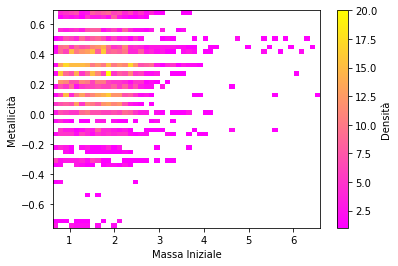

In [5]:
plt.hist2d(pop1['m_ini'], pop1['MsuH'], bins=(50,50), cmap='spring', cmin=1, label='prova')

plt.xlabel('Massa Iniziale')
plt.ylabel('Metallicità')
plt.colorbar(label='Densità')

plt.show()

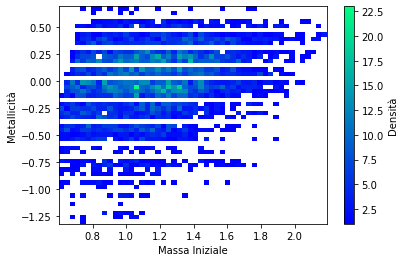

In [6]:
plt.hist2d(pop2['m_ini'], pop2['MsuH'], bins=(50,50), cmap='winter', cmin=1, label='prova')

plt.xlabel('Massa Iniziale')
plt.ylabel('Metallicità')
plt.colorbar(label='Densità')

plt.show()

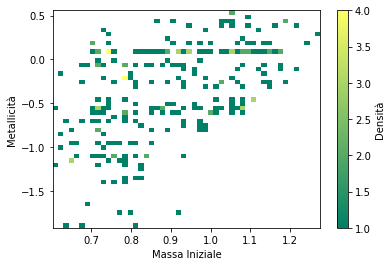

In [7]:
plt.hist2d(pop3['m_ini'], pop3['MsuH'], bins=(50,50), cmap='summer', cmin=1, label='prova')

plt.xlabel('Massa Iniziale')
plt.ylabel('Metallicità')
plt.colorbar(label='Densità')

plt.show()